# Data Pre Processing
* Exploratory Data Analysis
* Data Cleaning
* Feature Engineering
* Saving Data

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

## Read Datasets

In [2]:
links = pd.read_csv('Dataset/links.csv')
movies = pd.read_csv('Dataset/movies.csv')
ratings = pd.read_csv('Dataset/ratings.csv')
tags = pd.read_csv('Dataset/tags.csv')

For this project, we will use the following datasets:
Movies - contains information such as movie_id, title, genres.
Ratings - contains information such as user_id, movie_id, rating, timestamp.

This dataset can be downloaded from the following link: https://grouplens.org/datasets/movielens/latest/
We will be using the small dataset for this project.

## Data Analysis

### Movies Dataset

* there are 9742 movies in the small dataset
* there are 18 different genres
* the title column contains the year of release of the movie

In [3]:
print("movies shape: ", movies.shape)

movies shape:  (9742, 3)


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [6]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [7]:
year = pd.DataFrame()
year['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
year['year'] = pd.to_datetime(year['year'], format='%Y')
year['year'] = year['year'].dt.year

In [8]:
print("The movies were released between {} and {}".format(year.year.min(), year.year.max()))

The movies were released between 1902.0 and 2018.0


In [9]:
print(f"There are {year.year.isna().sum()} movies without a year.")

There are 13 movies without a year.


In [10]:
print(f"Those movies are: \n{movies[year.year.isna()].title.unique()}")

Those movies are: 
['Babylon 5' 'Ready Player One' 'Hyena Road'
 'The Adventures of Sherlock Holmes and Doctor Watson' 'Nocturnal Animals'
 'Paterson' 'Moonlight' 'The OA' 'Cosmos' 'Maria Bamford: Old Baby'
 'Death Note: Desu nôto (2006–2007)' 'Generation Iron 2' 'Black Mirror']


In [11]:
# one hot encoding of genres
genres = movies.genres.str.get_dummies(sep='|')

In [12]:
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
print(f"there are {genres[genres['(no genres listed)'] == 1].shape[0]} movies without genres listed.")

there are 34 movies without genres listed.


In [14]:
print(f"those movies are: \n{movies[genres['(no genres listed)'] == 1].title.unique()}")

those movies are: 
['La cravate (1957)' 'Ben-hur (2016)'
 'Pirates of the Caribbean: Dead Men Tell No Tales (2017)'
 'Superfast! (2015)' 'Let It Be Me (1995)'
 'Trevor Noah: African American (2013)' 'Guardians (2016)'
 'Green Room (2015)' 'The Brand New Testament (2015)' 'Hyena Road'
 'The Adventures of Sherlock Holmes and Doctor Watson'
 'A Cosmic Christmas (1977)' 'Grease Live (2016)' 'Noin 7 veljestä (1968)'
 'Paterson' 'Ali Wong: Baby Cobra (2016)'
 "A Midsummer Night's Dream (2016)" 'The Forbidden Dance (1990)'
 'Ethel & Ernest (2016)' 'Whiplash (2013)' 'The OA' 'Lemonade (2016)'
 'Cosmos' 'Maria Bamford: Old Baby' 'Death Note: Desu nôto (2006–2007)'
 'Generation Iron 2' 'T2 3-D: Battle Across Time (1996)'
 'The Godfather Trilogy: 1972-1990 (1992)'
 'The Adventures of Sherlock Holmes and Doctor Watson: The Hunt for the Tiger (1980)'
 'The Putin Interviews (2017)' 'Black Mirror'
 'Too Funny to Fail: The Life and Death of The Dana Carvey Show (2017)'
 'Serving in Silence: The Margar

In [15]:
print(f"there are {movies[(genres['(no genres listed)'] == 1) & (year.year.isna())].shape[0]} movies without genres and year listed.")

print(f"those movies are: \n{movies[(genres['(no genres listed)'] == 1) & (year.year.isna())].title.unique()}")

there are 9 movies without genres and year listed.
those movies are: 
['Hyena Road' 'The Adventures of Sherlock Holmes and Doctor Watson'
 'Paterson' 'The OA' 'Cosmos' 'Maria Bamford: Old Baby'
 'Death Note: Desu nôto (2006–2007)' 'Generation Iron 2' 'Black Mirror']


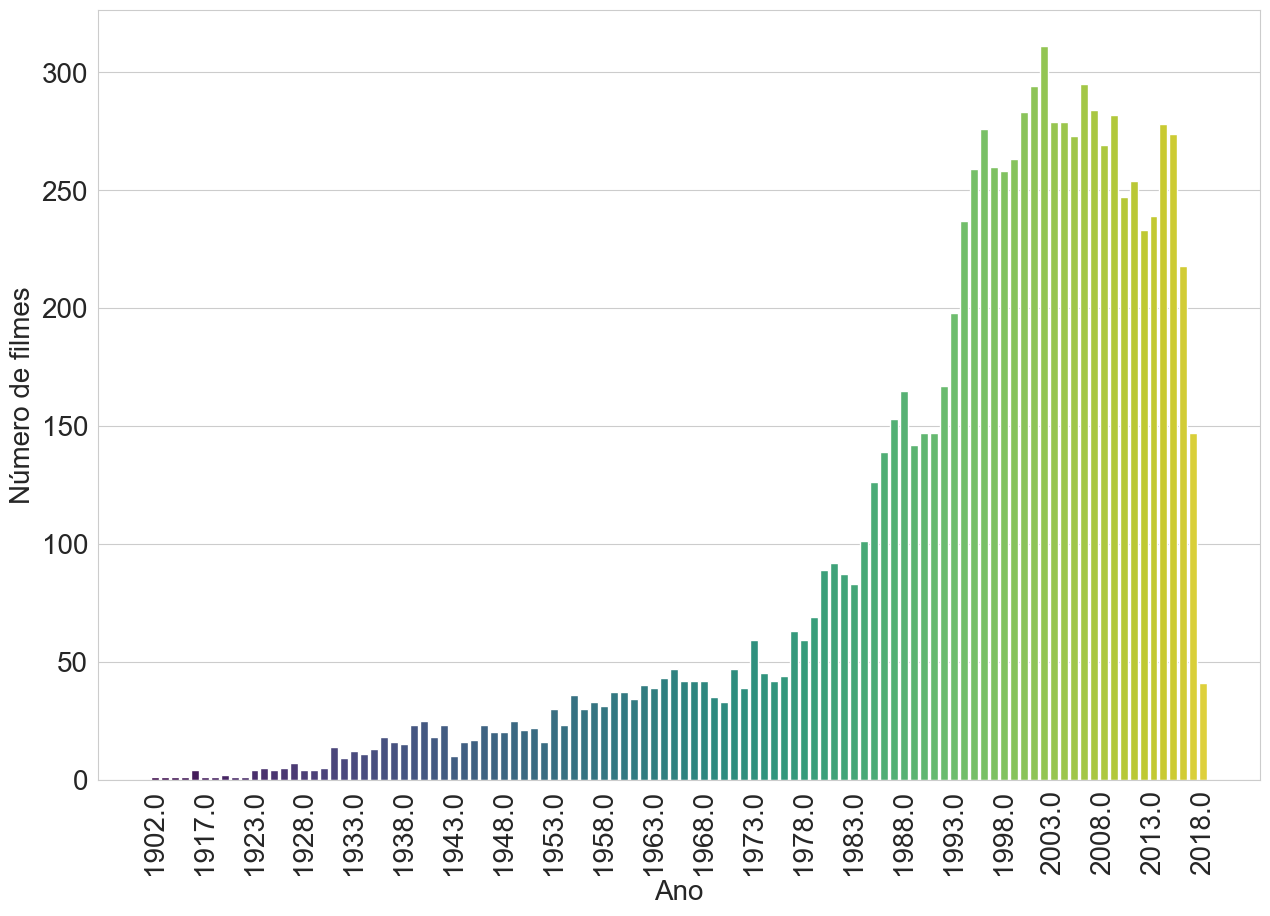

In [16]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.countplot(x=year.year, data=year, palette='viridis')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=20)
plt.ylabel('Número de filmes', fontsize=20)
plt.locator_params(axis='x', nbins=24)
plt.show()

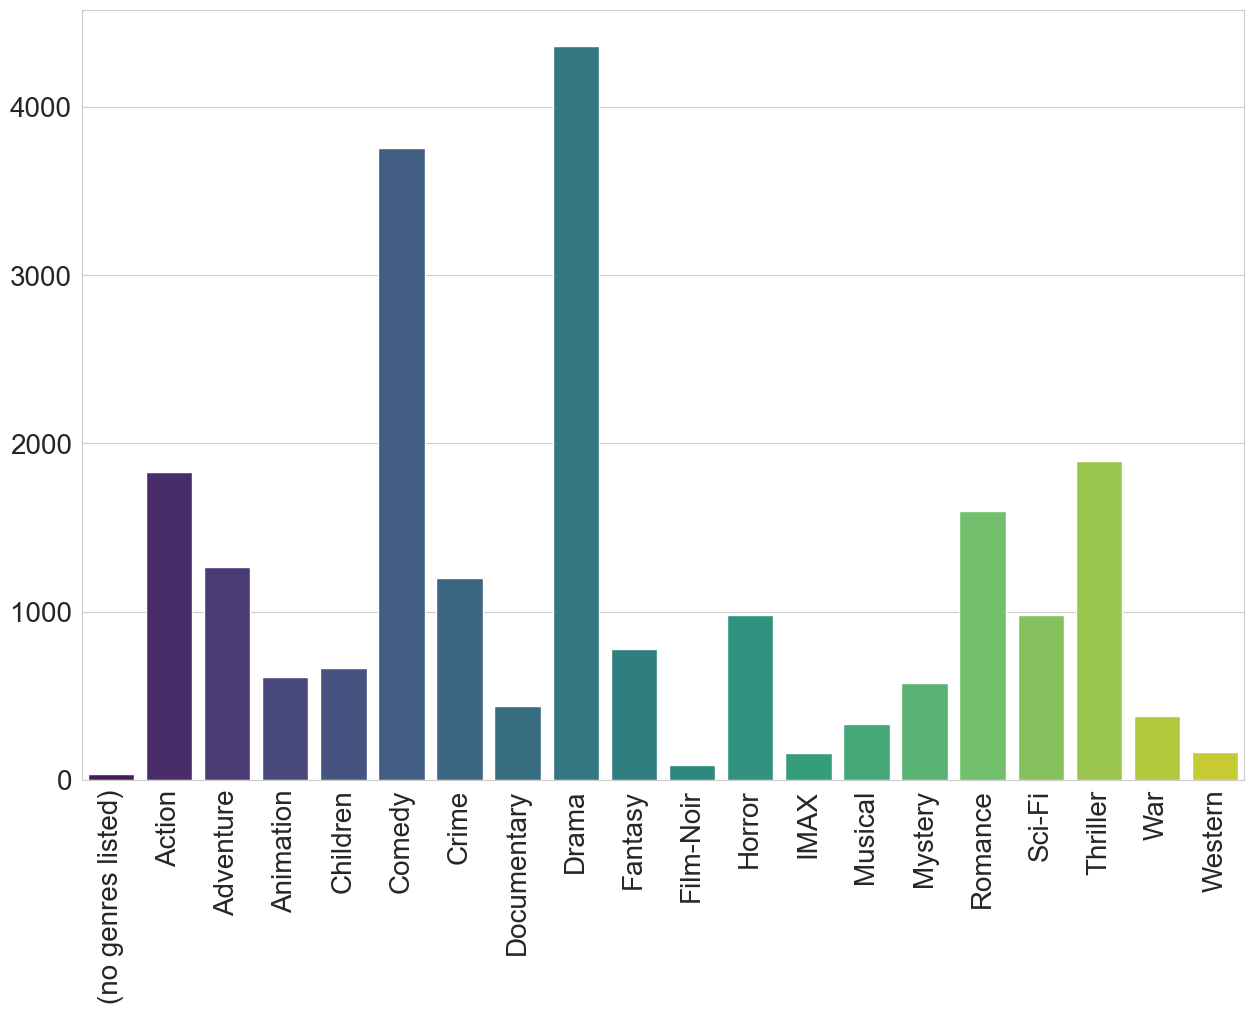

In [17]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.barplot(x=genres.columns, y=genres.sum().values, palette='viridis')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

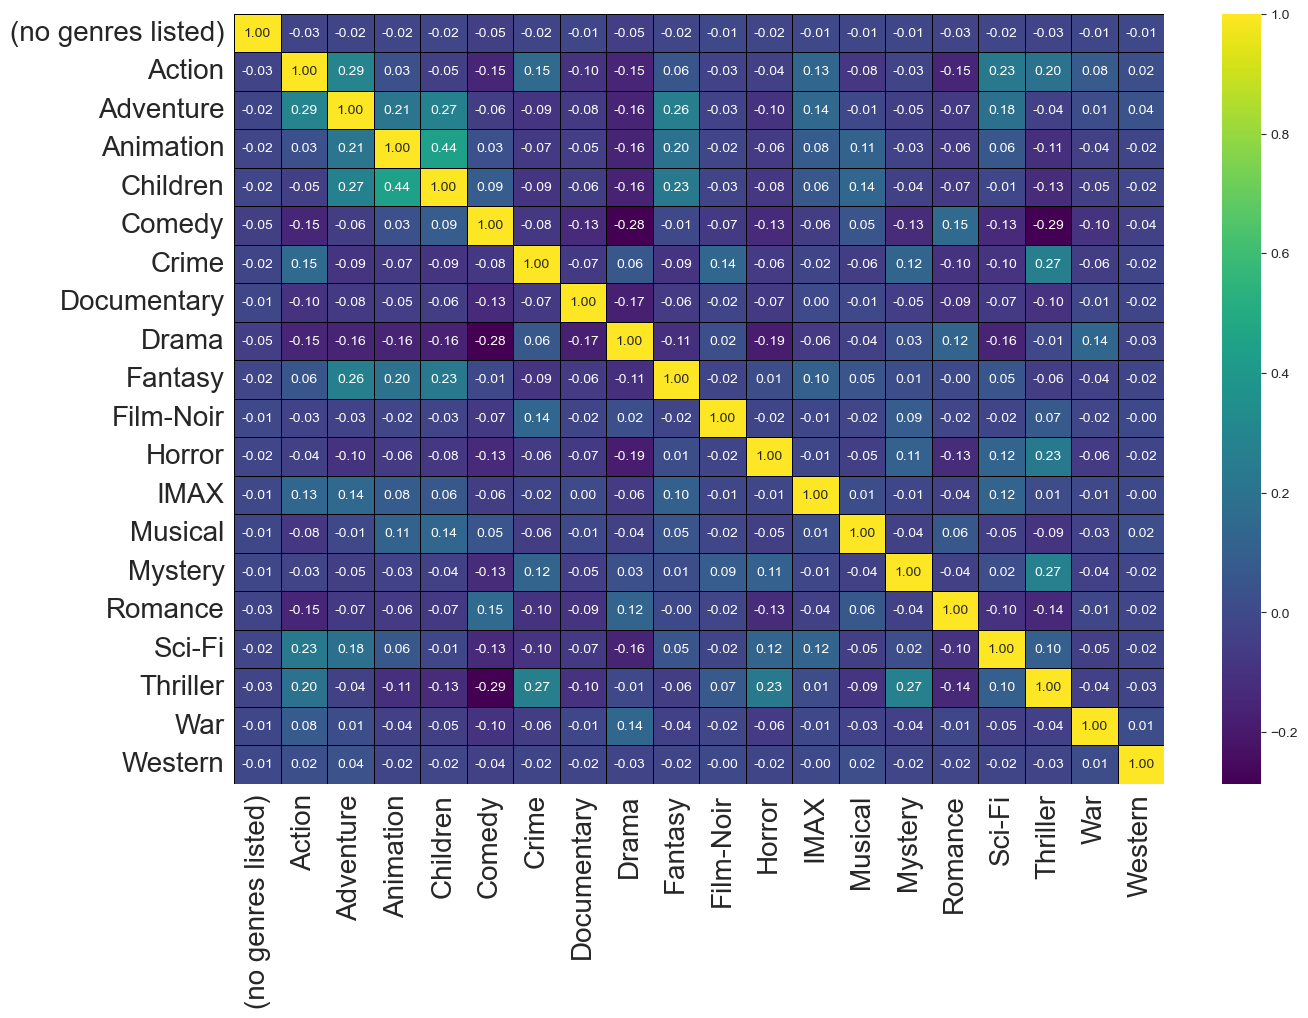

In [18]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.heatmap(genres.corr(), cmap='viridis', annot=True, fmt='.2f', linewidths=0.5, linecolor='black')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.show()

#### Data Cleaning and Feature Engineering

In [19]:
# add the year column
movies['year'] = year

In [20]:
# add the one hot encoding of genres
movies = pd.concat([movies, genres], axis=1)

# delete the genres column
movies.drop('genres', axis=1, inplace=True)

In [ ]:
# delete movies without genres
movies = movies[genres['(no genres listed)'] == 0]

# delete movies without year
movies = movies[year.year.notna()]

In [22]:
# remove the movies with no ratings
movies = movies[movies.movieId.isin(ratings.movieId.unique())]

In [23]:
# show how many movies are left
print(f"There are {movies.shape[0]} movies left after cleaning the dataset.")

There are 9686 movies left after cleaning the dataset.


In [24]:
# remove the year from the title
movies['title'] = movies['title'].replace("\(\d{4}\)", "", regex=True)

In [25]:
movies.shape

(9686, 23)

In [26]:
# TF-IDF vectorizer for the title column
tfidf = TfidfVectorizer(stop_words='english')

# title lowercase
movies['title'] = movies['title'].str.lower()

# TF-IDF matrix
tf_idf_matrix = tfidf.fit_transform(movies['title'])

# dataframe with the TF-IDF matrix
tfidf_df = pd.DataFrame(tf_idf_matrix.toarray(), index=movies.index.tolist())

In [27]:
# concatenate the TF-IDF matrix with the movies dataframe
movies = pd.concat([movies, tfidf_df], axis=1).drop('title', axis=1)

In [28]:
movies.head()

,movieId,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,8917,8918,8919,8920,8921,8922,8923,8924,8925,8926
0,1,1995.0,0,0,1,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1995.0,0,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1995.0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1995.0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1995.0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
movies['year'] = movies['year'].astype(int)

year = pd.DataFrame()
year['year'] = movies['year']

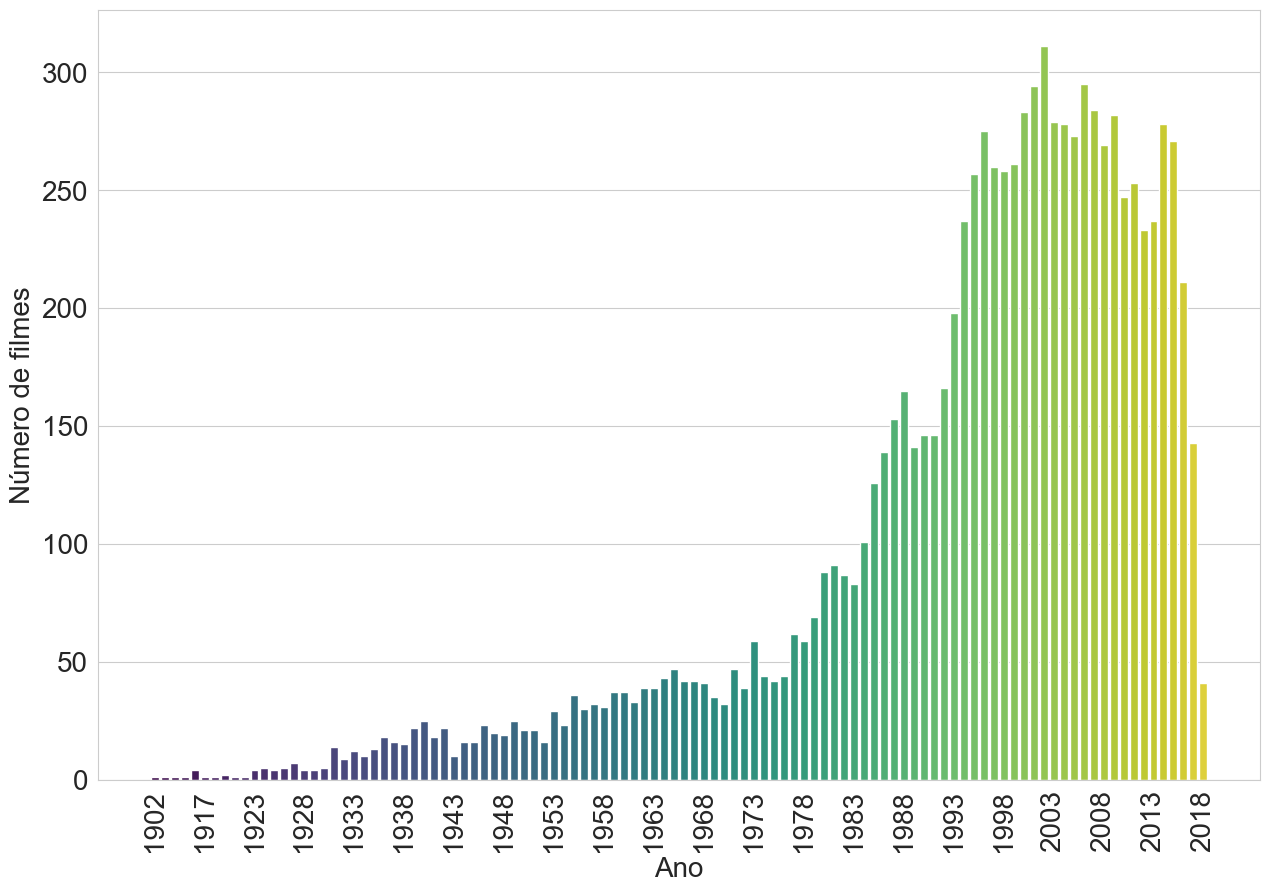

In [30]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.countplot(x=year.year, data=year, palette='viridis')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=20)
plt.ylabel('Número de filmes', fontsize=20)
plt.locator_params(axis='x', nbins=24)
plt.show()

### Ratings

In [31]:
print("ratings shape: ", ratings.shape)

ratings shape:  (100836, 4)


In [32]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [33]:
# number of reviews per user
user_counts = pd.DataFrame(ratings.groupby('userId')['rating'].count())
user_counts.describe()


,rating
count,610.000000
mean,165.304918
std,269.480584
min,20.000000
25%,35.000000
50%,70.500000
75%,168.000000
max,2698.000000


In [34]:
# number of reviews per movie
movie_counts = pd.DataFrame(ratings.groupby('movieId')['rating'].count())
movie_counts.describe()

,rating
count,9724.000000
mean,10.369807
std,22.401005
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,329.000000


In [35]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [36]:
print(f"The ratings are between {pd.to_datetime(ratings['timestamp'].min(), unit='s')} and {pd.to_datetime(ratings['timestamp'].max(), unit='s')}")

The ratings are between 1996-03-29 18:36:55 and 2018-09-24 14:27:30


In [37]:
ratings.groupby('userId')['rating'].count().sort_values(ascending=False).head(10)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: rating, dtype: int64

In [38]:
# movies with the most ratings
ratings.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)


movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: rating, dtype: int64

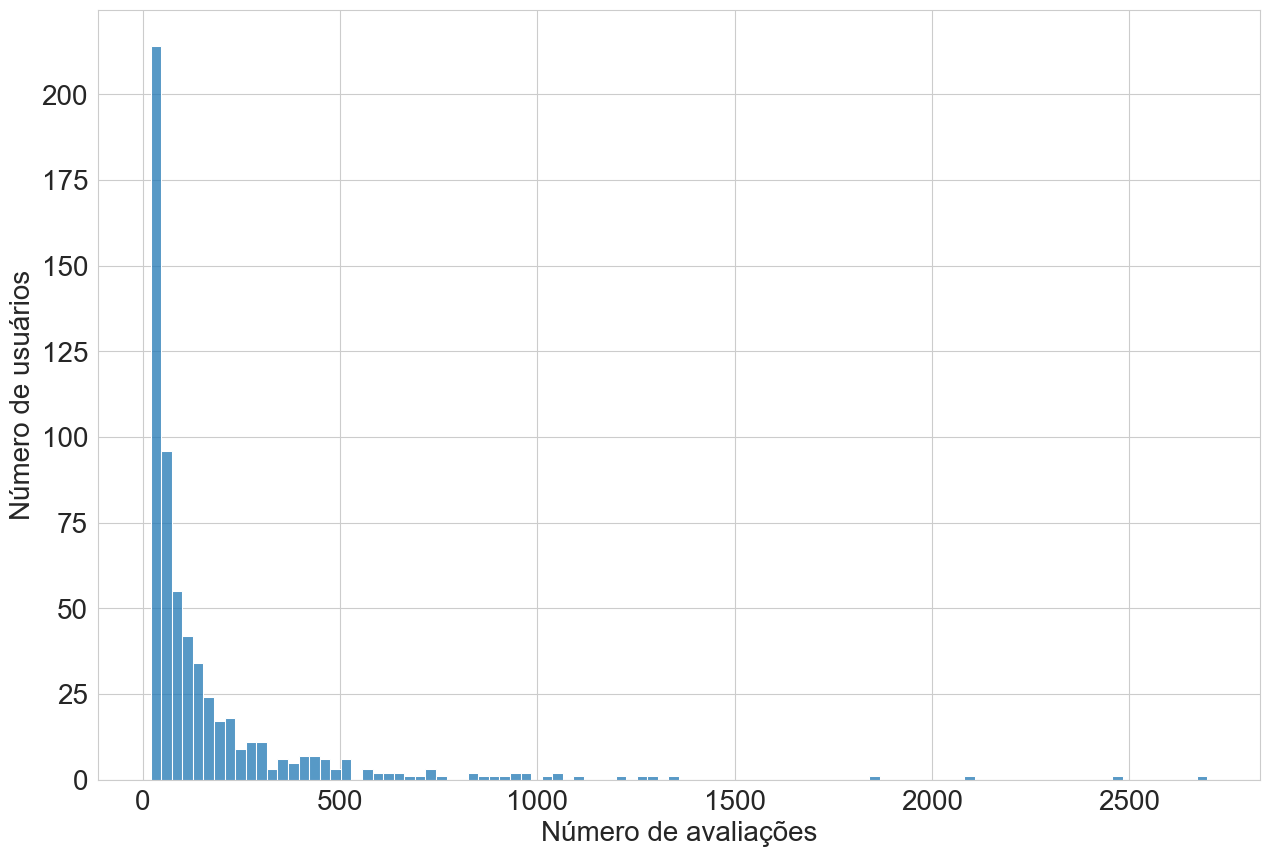

In [39]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.histplot(ratings.groupby('userId')['rating'].count().sort_values(ascending=False), kde=False, bins=100)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Número de avaliações', fontsize=20)
plt.ylabel('Número de usuários', fontsize=20)


plt.show()

In [40]:
ratings.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)

movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: rating, dtype: int64

In [41]:
ratings.groupby('movieId')['rating'].count().sort_values(ascending=True).head(10)

movieId
193609    1
4032      1
57526     1
57522     1
57502     1
57499     1
57421     1
57326     1
57147     1
4046      1
Name: rating, dtype: int64

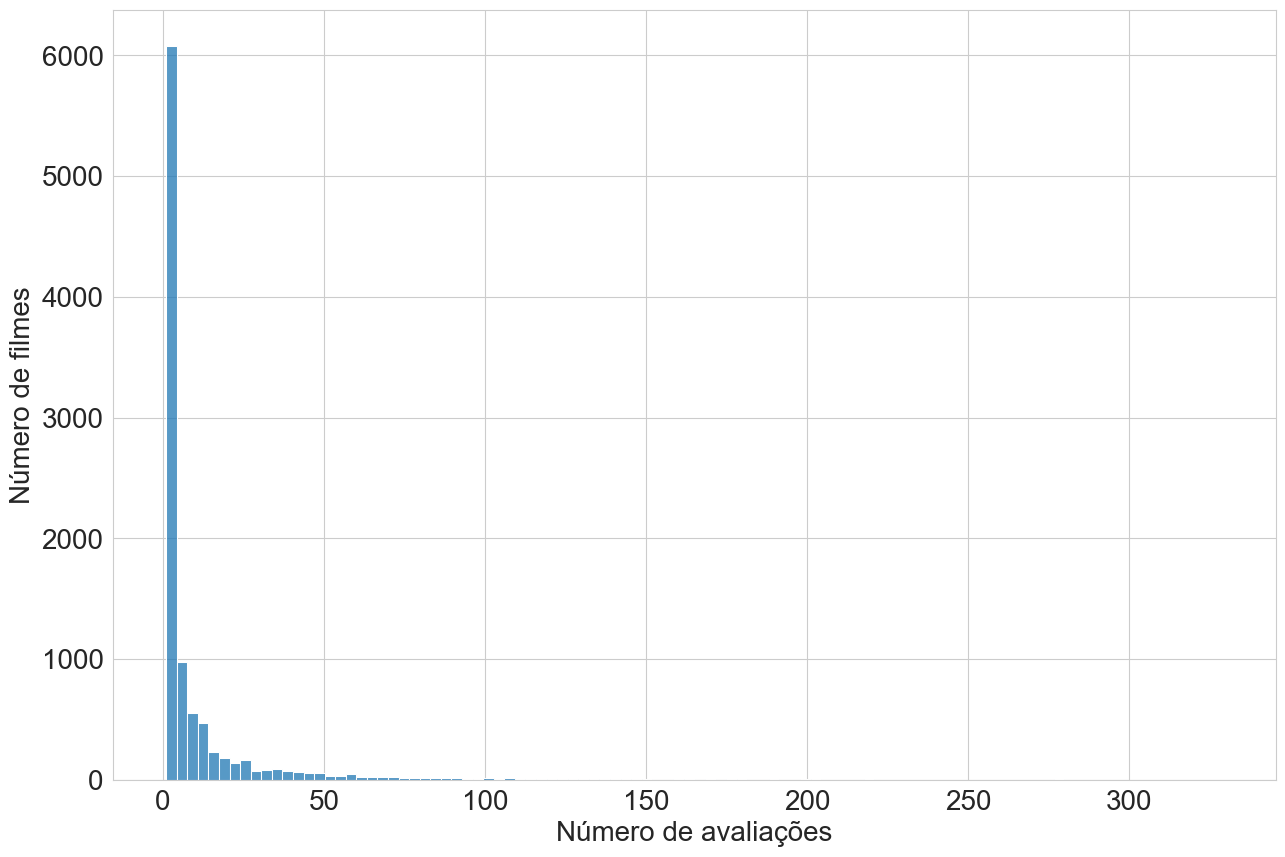

In [42]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.histplot(ratings.groupby('movieId')['rating'].count().sort_values(ascending=False), kde=False, bins=100)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Número de avaliações', fontsize=20)
plt.ylabel('Número de filmes', fontsize=20)
plt.show()

In [43]:
ratings['movieId'].nunique()

9724

In [44]:
ratings['userId'].nunique()

610

#### Data Cleaning

In [45]:
ratings = ratings[ratings.movieId.isin(movies.movieId)]

In [46]:
print(ratings[ratings['userId'] == 442])

       userId  movieId  rating   timestamp
68317     442      362     2.5  1331560498
68318     442      468     1.5  1331560538
68319     442      524     2.0  1331560506
68320     442      610     1.0  1331560545
68321     442      616     1.5  1331560512
68322     442     1186     1.0  1331560556
68323     442     1231     1.0  1331560577
68324     442     1272     0.5  1331560460
68325     442     1644     0.5  1331560575
68326     442     2020     1.0  1331560570
68327     442     2145     2.0  1331560550
68328     442     2881     0.5  1331560518
68329     442     2908     2.0  1331560472
68330     442     3107     0.5  1331560477
68331     442     3363     1.5  1331560564
68332     442     3386     0.5  1331560586
68333     442     3510     1.0  1331560487
68334     442     3752     2.0  1331560582
68335     442     3863     0.5  1331560522
68336     442     4361     2.5  1331560492


In [47]:
minimum_ratings = 15
user_ratings_counts = ratings['userId'].value_counts()
ratings = ratings[ratings['userId'].isin(user_ratings_counts[user_ratings_counts > minimum_ratings].index)]

In [48]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [49]:
print(ratings.groupby('userId')['rating'].count().sort_values(ascending=True).head(10))

userId
442    20
406    20
147    20
194    20
569    20
576    20
431    20
207    20
278    20
320    20
Name: rating, dtype: int64


In [50]:
print(f"There are {ratings.shape[0]} ratings left after cleaning the dataset.")

There are 100781 ratings left after cleaning the dataset.


In [51]:
print(f"There are {ratings[ratings['rating'] == 0].shape[0]} ratings with 0.")

There are 0 ratings with 0.


#### Feature Engineering

In [52]:
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

user_item_matrix = user_item_matrix.fillna(0)

In [53]:
user_item_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
print(user_item_matrix.shape)

(610, 9686)


In [55]:
sparsity = float(len(user_item_matrix.values.nonzero()[0]))
sparsity /= (user_item_matrix.shape[0] * user_item_matrix.shape[1])
sparsity *= 100
print(f"The sparsity level of the MovieLens100K dataset is {sparsity:.2f} %")

The sparsity level of the MovieLens100K dataset is 1.71 %
